In [3]:
import numpy as np
import os
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)

In [4]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0           0       0       0       0       0       0       0       0       0   
 1           0       0       0       0       0       0       0       0       0   
 2           0       0       0       0       0       0       0       0       0   
 3           0       0       0       0       0       0       0       0       0   
 4           0       0       0       0       0       0       0       0       0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995       0       0       0       0       0       0       0       0       0   
 69996       0       0       0       0       0       0       0       0       0   
 69997       0       0       0       0       0       0       0       0       0   
 69998       0       0       0       0       0       0       0       0       0   
 69999       0       0       0       0       0       0       0       0       0   
 
      

In [5]:
X, y=mnist["data"],mnist["target"]
X.shape

(70000, 784)

In [6]:
y.shape

(70000,)

In [7]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [8]:
# 洗牌操作
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train.iloc[shuffle_index], y_train[shuffle_index]

In [9]:
# 洗牌操作
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train.iloc[shuffle_index], y_train[shuffle_index]

In [10]:
shuffle_index

array([30014, 20704, 39358, ..., 16650, 46800,  7085])

In [11]:
y_train_5 = (y_train == '5')
y_test = (y_test ==5)

In [12]:
y_train_5[:10]

30014    False
20704    False
39358    False
59901    False
34204    False
33490    False
47212    False
42902    False
35485    False
56263    False
Name: class, dtype: bool

In [13]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(max_iter=5,random_state=42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(max_iter=5, random_state=42)

In [14]:
print([X.loc[35000]])
sgd_clf.predict([X.loc[35000]])

[pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Name: 35000, Length: 784, dtype: int64]


array([False])

In [15]:
y[35000]

'1'

In [16]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train_5, cv =3,scoring='accuracy')


array([0.88935, 0.90815, 0.88525])

In [127]:
# from sklearn.model_selection import StratifiedKFold
# from sklearn.base import clone

# skfolds=StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
# for train_index, test_index in skfolds.split(X_train,y_train_5):
#     clone_clf = clone(sgd_clf)
#     X_train_folds = X_train[train_index]
#     y_train_folds = y_train_5[train_index]
#     X_test_folds = X_train[test_index]
#     y_test_folds = y_train_5[test_index]
    
#     clone_clf.fit(X_train_folds,y_train_folds)
#     y_pred = clone_clf.predict(X_test_folds)
#     n_correct = sum(y_pred == y_test_folds)
#     print(n_correct/len(y_pred))

In [17]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

In [18]:
y_train_pred.shape

(60000,)

In [19]:
X_train.shape

(60000, 784)

In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_train_pred)

array([[53547,  1032],
       [ 5313,   108]])

In [21]:
from sklearn import metrics
float(metrics.precision_score(y_train_5,y_train_pred))

0.09473684210526316

In [22]:
from sklearn import metrics
float(metrics.recall_score(y_train_5,y_train_pred))

0.01992252351964582

In [23]:
float(metrics.f1_score(y_train_5,y_train_pred))

0.03292181069958848

In [30]:
y_scores = sgd_clf.decision_function([X.iloc[35000]])
y_scores

array([-183507.3512412])

loc函数：通过行索引 “Index” 中的具体值来取行数据（如取"Index"为"A"的行）

iloc函数：通过行号来取行数据（如取第二行的数据）

In [33]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

In [34]:
y_scores[:10]

array([-293255.35005309, -112992.761682  , -277401.58958661,
        -53490.02783755, -118084.27955025, -206319.19614187,
       -201020.96082726,  -61738.42708332, -118382.73874657,
       -343456.34607794])

In [35]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [36]:
thresholds

array([-846162.6377075 , -834231.48382116, -815889.50202025, ...,
        215688.07752615,  223661.84853994,  233402.54376728])

In [37]:
thresholds.shape

(60000,)

In [38]:
precisions[:10]

array([0.09035   , 0.09035151, 0.09033634, 0.09032118, 0.09032269,
       0.09032419, 0.0903257 , 0.0903272 , 0.09032871, 0.09033022])

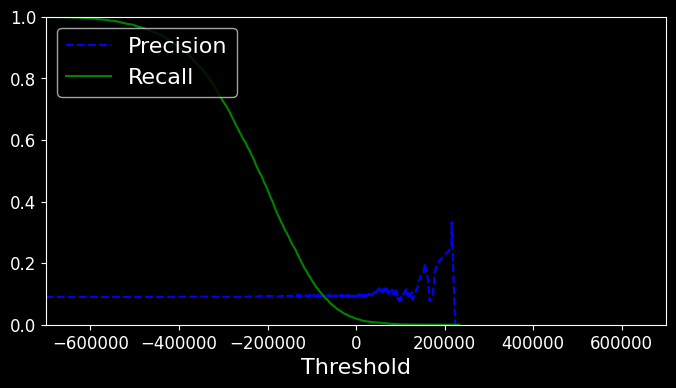

In [39]:
def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
    plt.plot(thresholds,
             precisions[:-1],
            "b--",
            label="Precision")
    
    plt.plot(thresholds,
             recalls[:-1],
            "g-",
            label="Recall")
    plt.xlabel("Threshold",fontsize=16)
    plt.legend(loc="upper left",fontsize=16)
    plt.ylim([0,1])
    
plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions,recalls,thresholds)
plt.xlim([-700000, 700000])
plt.show()

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

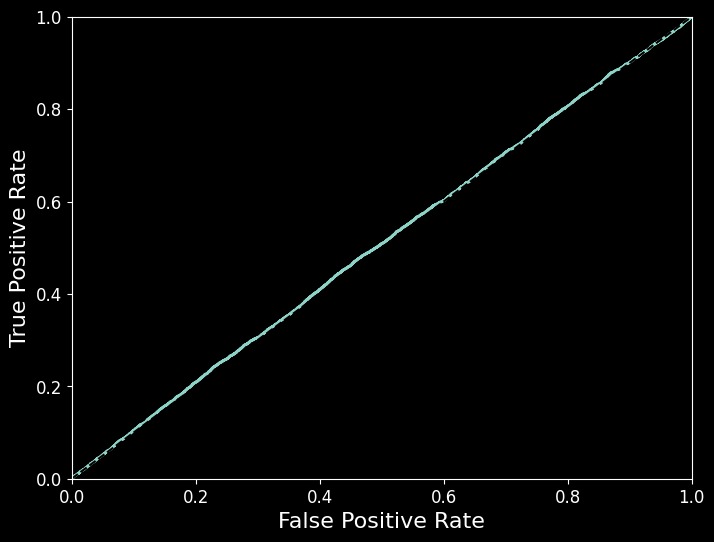

In [41]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

In [42]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

np.float64(0.5057887096662387)